**Some introductory examples on Inference**

The history of statistics (and therefore econometrics) is closely related to beer and gambling.

- Inference and Hypothesis testing in large Samples: Pearson/Poincare and Roulette
- Inference and Hypothesis testing in small Samples: The Student and the Guiness
- Regression analysis and horse betting


**Inference and Hypothesis testing in large Samples**

Pearson/Poincare and Roulette

Taken from The Perfect Bet: How Science is Taking the Luck out of Gambling - by Adam Kucharski

**Inference and Hypothesis testing in large Samples**

To understand randomness, Pearson believed it was important to collect as much data as possible
- He flipped a shilling twenty-five thousand times in his summer vacations, and draw 8000 lottery tickets from a back

When he was denied funding to watch the Roulette tables in Monaco, he found  out that Le Monaco  published the Roulette results from every week
- Ignoring the zero, out of the sixteen thousand or so spins published by Le Monaco, 50.15 per cent came up red 
    -  To work out whether the difference was down to chance, Pearson calculated the amount the observed spins deviated from 50 percent. 
    - Then he compared this with the variation that would be expected if the wheels were random. 
    - He found that a 0.15 per cent difference wasn’t particularly unusual, and it certainly didn’t give him a reason to doubt the randomness of the wheels.

Next, he looked at how often the same colour came up several times in a row. 
- When he compared the length of runs of different colours with the frequencies that he’d expect if the wheels were random, something looked wrong. 
- Runs of two or three of the same colour were scarcer than they should have been. 
- And runs of a single colour—say, a black sandwiched between two reds—were far too common. 
- Pearson calculated the probability of observing an outcome at least as extreme as this one, assuming that the roulette wheel was truly random. 
- This probability, which he dubbed the p value, was tiny. 
- So small, in fact, that Pearson said that even if he’d been watching the Monte Carlo tables since the start of Earth’s history, he would not have expected to see a result that extreme. 


Pearson was furious: ‘The man of science may proudly predict the results of tossing halfpence,’ he said, ‘but the Monte Carlo roulette confounds his theories and mocks at his laws.’ 

- Pearson suggested that the casinos be closed down and their assets donated to science. 
- However, it later emerged that Pearson’s odd results weren’t really due to faulty wheels. 
    - Although Le Monaco paid reporters to watch the roulette tables and record the outcomes, the reporters sat in a bar and made up the numbers.

And this is how a newspaper lent name to the Monte Carlo Simulation

**Small sample Experiments. Why Guiness is important in statistical science**

How to make one beer taste like the other, all around the world?

<br>  

<img src="figs\Guiness.png" width="100" align="right" /> 
    
<p>
    
Everyone who tried knows about the complicated process of beer brewing
- Central ingredients are hops, malted barley, water (, yeast)
- Barley and Hop have a lot of variability in terms of nutritional value. 
    - E.g., barley varieties differ in terms of sugar content, even though cultivated on the same unit area of land and under similar conditions
    - Sugar affects the degree of alcohol content in the final product which ideally should not vary 

A major problem for the guiness brewing company is therefore studying the sugar content in barley barrels

**How do can we ensure that the sample we draw is representative for the whole population?**

When comparing the mean of a sample to the mean of a population, we could be comfortable using the normal distribution 
- goes back to discovery of normal curve by Abraham de Moivre and statistical popularization by Sir Francis Galton
- Statisticians in the 18th century proposed using the formula of the so-called z-Test: $z=\frac{M-\mu}{\frac{\sigma}{\sqrt{N}}}$

No problem in large enough samples: 
- then we can replace the unkown standard deviation of the population by the standard deviation of the sample

**Not anyone has the luxory to use large samples**

Brewers want to minimize the draws of barley sample for testing
- every ounce of testing cannot be sold
- A sample size of, say, 30 is therefore not realistic. We are more in the range of 2-4
- We cannot simply plug in the population standard deviation because of the large probable error that we make 

This was the challenge faced by scientist William Sealy Gosset who worked for Guiness
- The goal is to estimate the mean, by collecting random samples each of the same size
- The mean of each draw naturally deviates from the population mean
- In large enough samples we can just draw many thousand times and calculate the deviation across draws
    - which is the standard error of the mean: $\frac{\sigma}{\sqrt{N}}$
    - we want this number to be as low as reasonably possible

Gosset noted that the standard error is only determined by two things: 
- the standard deviation and the sample size
- Plot the probable error with respect to the sample size
- $N=1$: the probable error that we make in estimating the standard deviation is as large as the standard deviation
- Decreasing dramatically at small sample sizes, then flattens out

What is the "optimal" minimum number of draws?  
- He noted that estimating with small samples increases the standard error of the mean 
    - the random error/noise of the test statistic
    - Bias: this random error goes consistently in the same direction  

This bias changes the shape of the distribution
- Gosset developed a new famility of distributions (t-distributions) for small samples
- Idea of using monte carlo methods to tabulate quantiles and construct its tables (small samples) 
- Unlike Karl Pearson, who always put focus on the asymptotic case (large samples)

<br>  

<img src="figs\distributions.png" width="400" /> 
    
<p>

- Flatter than the normal distributions
- The cutoff points of t-distributions that indicate the top 2.5\% on each side are more spread out than the ones of the z-distribution
- The t-statistic is always larger than the z-statistic (larger than 1.96)

Gosset published his results in Pearson's journal Biometrika in 1908
- R.A. Fisher corrected the formula by $N-1$ (degrees of freedom)  

<br>  

<img src="figs\student.png" width="300" /> 
    
<p>

Guiness didn't want to acknowledge the potential variablity in beer nor its competitors to apply the results

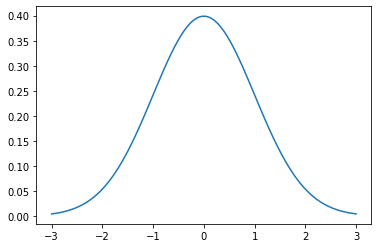

In [78]:

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()


**Exercise**
- The sugar content of malt extract was measured by degrees saccharine per barrel of 168 pounds malt weight. 
- In earlier experiments the brewers determined that an extract around 133 degrees saccharine gave the desired alcohol level.
- In Gosset’s view, 0.5 degrees was a difference or error in malt extract level which Guinness and its customers could accept. With a 10 to 1 odds of being within 0.5 degree.

How can we be certain that a barrel has a sugar content of 133 degrees, minimizing the number of costly draws?
- Gosset simulated what would happen if they drew and averaged multiple samples
    - What if we take 2 samples and average that out, is that close enough to the real value?
    - What if we take 3?
    - etc?

**Procedure**
1. Create a vector of samples from the same barrel of malt extract 
2. sample from those samples, take the average, 
4. see if we are within the range that Gosset defined, 
5. calculate how many times the sample was a correct representation of the barrel 
6. and finally determine how many samples are enough.

In [1]:
# https://blog.rmhogervorst.nl/blog/2019/10/11/gosset-part-2-small-sample-statistics/#fn6

import pandas as pd
import numpy as np

np.random.seed(1)

mu, sigma = 133, 0.5 # mean and standard deviation

draws=1000   

d = {} 
for x in range(11):
    d["group" + str(x)] = np.random.normal(mu, sigma, size=(draws, x))

d_values = list(d.values())

In [59]:
# %% # 1 Draw
array1 = np.array(d_values[1])

array1.mean()
array1.mean(0)

array1[ np.where((array1 < (mu-sigma) ) |  (array1 > (mu+sigma) ) ) ]

freq1=( (array1 > (mu-sigma))  &  (array1 < (mu+sigma))).sum()
print(freq1/(1*draws))

array1.sum()/ (1*draws)

np.std(array1)

133.0605828520757

In [55]:
# %% # 2 Draws
array2 = np.array(d_values[2])

array2.mean()
array2.mean(0)

array2[ np.where((array2 < 132 ) |  (array2 > (mu+sigma) ) ) ]
freq2=( (array2 > (mu-sigma))  &  (array2 < (mu+sigma))).sum()
print(freq2/(2*draws))

array2.sum()/ (2*draws)

np.std(array2)

133.0813083361914

In [56]:
# %% # 3 Draws
array3 = np.array(d_values[3])

array3.mean()
array3.mean(0)

array3[ np.where((array3 < (mu-sigma) ) |  (array3 > (mu+sigma) ) ) ]
freq3=( (array3 > (mu-sigma))  &  (array3 < (mu+sigma))).sum()
print(freq3/(3*draws))

array3.sum()/ (3*draws)

np.std(array3)

133.05652493977385

In [57]:
# %% # 4 Draws
array4 = np.array(d_values[4])

array4.mean()
array4.mean(0)

array4[ np.where((array4 < (mu-sigma) ) |  (array4 > (mu+sigma) ) ) ]
freq4=( (array4 > (mu-sigma))  &  (array4 < (mu+sigma))).sum()
print(freq4/(4*draws))

array4.sum()/ (4*draws)

np.std(array4)

132.998837604454

**Wine Example**
The dataset used is Wine Quality Data set from UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Wine+Quality

See: 
- https://medium.datadriveninvestor.com/regression-from-scratch-wine-quality-prediction-d61195cb91c8
- https://towardsdatascience.com/red-wine-quality-prediction-using-regression-modeling-and-machine-learning-7a3e2c3e1f46

In [64]:
# Import data and Print head 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

df = pd.read_csv('data\winequality-red.csv' , sep = ';')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [65]:
# Finding correlations between each attribute of dataset using corr()
# there are no categorical variables. each feature is a number. Regression problem. 
# Given the set of values for features, we have to predict the quality of wine. finding correlation of each feature with our target variable - quality
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


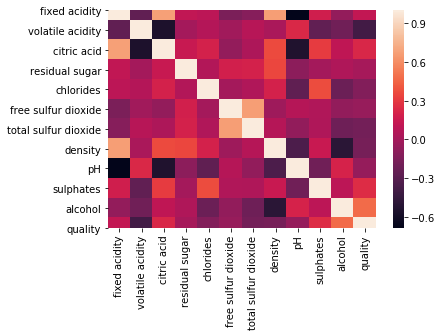

In [67]:
# To draw a heatmap and get a detailed diagram of correlation, insert the below code.
sns.heatmap(df.corr())
plt.show()